#**Data Preparation:**


```
คุณต้องหาข้อมูลและทำการแยกชุดข้อมูล training, validation, และ test sets
```



In [ ]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('codon_usage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

<ipython-input-57-b6d8af0df36a>:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('codon_usage.csv')


###**Clean Data:**

**เหตุผลในการ clean data:** เราทำการนำค่า 0 และค่า null ออกไป เพราะว่า เราไม่สามารถคาดเดาได้ว่า data(CUGT - รหัสพันธุกรรม) แต่ละตัวมันสามารถเป็นค่า 0/null ได้รึเปล่า ดังนั้นถ้าเราจะใช้ data พวกนั้นอาจจะให้ผลลัพธ์ที่ไม่ดี และเราจำเป็นที่จะต้องมีการแปลง String ให้เป็นตัวเลขเพราะว่า รหัสพันธุกรรมควรมีค่าเป็นตัวเลข แต่พบค่าผิดปกติ ซึ่งทำให้ใน column UUU, UUC นั้นมีค่าเป็น object แทนที่จะเป็นตัวเลข

In [ ]:
# หาค่า null ว่ามีอยู่ใน dataset หรือเปล่า
print("Nulls")
print("=====")

print(df[['DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName']].isnull().sum())

print(df[[ 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG']].isnull().sum()) 

print(df[[  'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA']].isnull().sum()) 

Nulls
=====
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
dtype: int64
UUU    0
UUC    0
UUA    0
UUG    0
CUU    0
CUC    0
CUA    0
CUG    0
AUU    0
AUC    0
AUA    0
AUG    0
GUU    0
GUC    0
GUA    0
GUG    0
GCU    0
GCC    0
GCA    0
GCG    0
CCU    0
CCC    0
CCA    0
CCG    0
UGG    0
dtype: int64
GGU    0
GGC    0
GGA    0
GGG    0
UCU    0
UCC    0
UCA    0
UCG    0
AGU    0
AGC    0
ACU    0
ACC    0
ACA    0
ACG    0
UAU    0
UAC    0
CAA    0
CAG    0
AAU    0
AAC    0
UGU    0
UGC    0
CAU    0
CAC    0
AAA    0
AAG    0
CGU    0
CGC    0
CGA    0
CGG    0
AGA    0
AGG    0
GAU    0
GAC    0
GAA    0
GAG    0
UAA    0
UAG    0
UGA    0
dtype: int64


In [ ]:
# หาค่า 0 ว่ามีอยู่ใน dataset หรือเปล่า
print("0s")
print("==")
print(df[['DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName']].eq(0).sum())

print(df[[ 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG']].eq(0).sum())

print(df[[  'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA']].eq(0).sum())

0s
==
DNAtype        9267
SpeciesID         0
Ncodons           0
SpeciesName       0
dtype: int64
UUU     12
UUC      7
UUA    460
UUG    452
CUU     35
CUC    241
CUA    275
CUG    223
AUU     51
AUC     15
AUA    289
AUG     13
GUU    106
GUC     94
GUA    111
GUG    418
GCU     21
GCC     86
GCA     25
GCG    831
CCU     53
CCC    204
CCA     69
CCG    753
UGG    406
dtype: int64
GGU     134
GGC     176
GGA      34
GGG     201
UCU     131
UCC     104
UCA     103
UCG     816
AGU     591
AGC     196
ACU      70
ACC      71
ACA     100
ACG     646
UAU     122
UAC      36
CAA      54
CAG     452
AAU      60
AAC      24
UGU     839
UGC     508
CAU     147
CAC      88
AAA      57
AAG     405
CGU     579
CGC     506
CGA     337
CGG    1399
AGA    1772
AGG    2230
GAU     261
GAC     114
GAA      16
GAG     438
UAA    1812
UAG    4329
UGA    2145
dtype: int64


In [ ]:
#  loop ข้อมูลใน datafram เพิ่อหาค่า value ที่ไม่ใช่ float ใน UUU แล้วถ้ามีค่าไหนที่เป็น string จะ print value นั้นออกมา
for row in range(len(df)):
    try:
        float(df.iloc[row].loc['UUU'])
    except:
#         df.iloc[row].loc['UUC'] = -99
        print(df.iloc[row].loc['UUU'])

non-B hepatitis virus
12;I


In [ ]:
#  loop ข้อมูลใน datafram เพิ่อหาค่า value ที่ไม่ใช่ float ใน UUC แล้วถ้ามีค่าไหนที่เป็น string จะ print value นั้นออกมา
for row in range(len(df)):
    try:
        float(df.iloc[row].loc['UUC'])
    except:
#         df.iloc[row].loc['UUC'] = -99
        print(df.iloc[row].loc['UUC'])

-


In [ ]:
print("-------Check null-------")
print(df[[ 'UUU', 'UUC']].isnull().sum()) 

-------Check null-------
UUU    0
UUC    0
dtype: int64


In [ ]:
# ทำการแปลงค่าใน UUU ให้เป็น number ทั้งหมด โดยจะทำให้ตัวที่เป็น String กลายเป็นค่า null เพราะไม่สามารถแปลงค่าได้
df['UUU'] = df['UUU'].apply(pd.to_numeric, errors='coerce')

In [ ]:
# ทำการแปลงค่าใน UUC ให้เป็น number ทั้งหมด โดยจะทำให้ตัวที่เป็น String กลายเป็นค่า null เพราะไม่สามารถแปลงค่าได้
df['UUC'] = df['UUC'].apply(pd.to_numeric, errors='coerce')

In [ ]:
print("-------Check null again na-------")
print(df[[ 'UUU', 'UUC']].isnull().sum()) 

-------Check null again na-------
UUU    2
UUC    1
dtype: int64


In [ ]:
#เป็นการลบ row ที่มีค่า null ทั้งหมดที่มึอยู่
df = df.dropna(how='any',axis=0)

In [ ]:
print("-------Check null again na na-------")
print(df[[ 'UUU', 'UUC']].isnull().sum()) 

-------Check null again na na-------
UUU    0
UUC    0
dtype: int64


In [ ]:
#เป็นการลบ row ที่มีค่า 0 
df = df.loc[(df[[ 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG',  'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA' ]] != 0).all(axis=1)]

In [ ]:
print("0s")
print("==")
print(df[['DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName']].eq(0).sum())

print(df[[ 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG']].eq(0).sum())

print(df[[  'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA' ]].eq(0).sum())

0s
==
DNAtype        4981
SpeciesID         0
Ncodons           0
SpeciesName       0
dtype: int64
UUU    0
UUC    0
UUA    0
UUG    0
CUU    0
CUC    0
CUA    0
CUG    0
AUU    0
AUC    0
AUA    0
AUG    0
GUU    0
GUC    0
GUA    0
GUG    0
GCU    0
GCC    0
GCA    0
GCG    0
CCU    0
CCC    0
CCA    0
CCG    0
UGG    0
dtype: int64
GGU    0
GGC    0
GGA    0
GGG    0
UCU    0
UCC    0
UCA    0
UCG    0
AGU    0
AGC    0
ACU    0
ACC    0
ACA    0
ACG    0
UAU    0
UAC    0
CAA    0
CAG    0
AAU    0
AAC    0
UGU    0
UGC    0
CAU    0
CAC    0
AAA    0
AAG    0
CGU    0
CGC    0
CGA    0
CGG    0
AGA    0
AGG    0
GAU    0
GAC    0
GAA    0
GAG    0
UAA    0
UAG    0
UGA    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 5 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      5555 non-null   object 
 1   DNAtype      5555 non-null   int64  
 2   SpeciesID    5555 non-null   int64  
 3   Ncodons      5555 non-null   int64  
 4   SpeciesName  5555 non-null   object 
 5   UUU          5555 non-null   float64
 6   UUC          5555 non-null   float64
 7   UUA          5555 non-null   float64
 8   UUG          5555 non-null   float64
 9   CUU          5555 non-null   float64
 10  CUC          5555 non-null   float64
 11  CUA          5555 non-null   float64
 12  CUG          5555 non-null   float64
 13  AUU          5555 non-null   float64
 14  AUC          5555 non-null   float64
 15  AUA          5555 non-null   float64
 16  AUG          5555 non-null   float64
 17  GUU          5555 non-null   float64
 18  GUC          5555 non-null   float64
 19  GUA  

###**Split Data:**

In [ ]:
df.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

In [ ]:
# ทำการแบ่ง feature และ label
feature = [
       'Ncodons',  'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'
]

X = df[feature]
y = df['Kingdom'].values

print('X: ', X.shape)
print('y: ',y.shape)

X:  (5555, 65)
y:  (5555,)


In [ ]:
# ทำการแบ่ง data ออกเป็น 3 ส่วนคือ train = 60%, valid=20%, test=20%
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.4, random_state=1)
X_cv, X_test, y_cv, y_test  = train_test_split(X_cv, y_cv, test_size=0.5, random_state=1)

print(f"Training set(train.csv): {X_train.shape} {y_train.shape}")
print(f"Test set(train.csv): {X_test.shape} {y_test.shape}")
print(f"valid set(train.csv): {X_cv.shape} {y_cv.shape}")
print('----------------------')

Training set(train.csv): (3333, 65) (3333,)
Test set(train.csv): (1111, 65) (1111,)
valid set(train.csv): (1111, 65) (1111,)
----------------------


#**Data Preprocessing:**


```
ขั้นตอนการเตรียมชุดข้อมูล ยกตัวอย่างเช่น feature scaling, feature encoding, และวิธีการ feature engineering อื่น ๆ เพื่อให้แน่ใจว่าชุดข้อมูลพร้อมสำหรับการวิเคราะห์และเรียนรู้
```



**Data Preprocessing:** เราได้ Encode ข้อมูล 'Kingdom' เพื่อให้สามารถนำไปใช้งานในการ predict ข้อมูลได้ จากนั้นเราก็ได้ทำ feature selection เพื่อนำไปทำ model เปรียบเทียบว่า model แบบไหนจะดีกว่ากันระหว่างการ select feature กับ all feature เมื่อเราได้ feature ที่เลือกมาแล้วจึงนำมาแบ่งชุดข้อมูลอีกครั้ง

###**Feature Encoding**

In [ ]:
# ทำการ encode label ให้เป็นตัวเลข
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)

print(y_train.shape)

(3333,)


In [ ]:
# ทำการ encode label ให้เป็นตัวเลข
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_cv)
y_cv = label_encoder.transform(y_cv)

print(y_cv.shape)

(1111,)


In [ ]:
# ทำการ encode label ให้เป็นตัวเลข
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

print(y_test.shape)

(1111,)


###**Feature Selection:** 

ในส่วนของ Feature selection ได้มีการนำ feature ที่เป็นประเภทต่างๆ ของหน่วยพันธุกรรมนั้นมาทำ feature selection เพื่อหา feature ที่ส่งมีต่อการ predict ด้วยวิธีการทำ ANOVA เนื่องจาก feature ของหน่วยพันธุกรรมนั้นเป็น numerical

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

num_cols = ['UUU','UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA']

label_col = ['Kingdom']

X_num = df[num_cols]
y = df[label_col]

fs = SelectKBest(score_func=f_classif, k=5)
fs.fit(X_num, y)
X_selected = fs.transform(X_num)

print(f'Keep: {fs.get_support()}')

selected_features_indices = np.where(fs.get_support())[0]

selected_features_names = X_num.iloc[:, selected_features_indices].columns

print(selected_features_names)

Keep: [False False False False False False False False False False False False
 False False False False False False False  True  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False]
Index(['GCG', 'CCU', 'CCA', 'UGU', 'AGG'], dtype='object')


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###**Split Data After Select Feature:**

In [ ]:
# ทำการแบ่ง feature และ label
feature1 = ['GCG', 'CCU', 'CCA', 'UGU', 'AGG']

XF = df[feature1]
yF = df['Kingdom'].values

print('X: ', XF.shape)
print('y: ',yF.shape)

X:  (5555, 5)
y:  (5555,)


In [ ]:
# ทำการแบ่ง data ออกเป็น 3 ส่วนจาก data ที่เรา select feature มาแบ่งเป็น train = 60%, valid=20%, test=20%
from sklearn.model_selection import train_test_split
X_train1, X_cv1, y_train1, y_cv1 = train_test_split(XF, yF, test_size=0.4, random_state=1)
X_cv1, X_test1, y_cv1, y_test1  = train_test_split(X_cv1, y_cv1, test_size=0.5, random_state=1)

print(f"Training set(train.csv): {X_train1.shape} {y_train1.shape}")
print(f"Test set(train.csv): {X_test1.shape} {y_test1.shape}")
print(f"valid set(train.csv): {X_cv1.shape} {y_cv1.shape}")
print('----------------------')

Training set(train.csv): (3333, 5) (3333,)
Test set(train.csv): (1111, 5) (1111,)
valid set(train.csv): (1111, 5) (1111,)
----------------------


#**Model Selection:**


```
ทำการทดลองเพื่อเลือก settings ที่เหมาะสม ให้ใช้ข้อมูลชุด validation สำหรับการเก็บผลการทดลอง เพื่อให้ทราบถึงปัญหาของ overfitting หรือ underfitting จากนั้นให้ตัดสินใจวิธีการในการแก้ปัญหา นอกจากกนี้การทำ error analysis 
โดยการนำเอาผลลัพธ์ที่ผิดพลาดมาวิเคราะห์อาจช่วยให้คุณตัดสินใจการแก้ปัญหาต่อไปได้ ในขั้นตอนนี้ให้คุณปรับแต่งค่าต่าง ๆ ดังต่อไปนี้
    1. Feature engineering (feature scaling, feature encoding, or other feature engineering methods)
    2. Feature selection
    
    Evaluation metrics (การวัดผลจะต้องใช้การวัดผลที่เหมาะสมกับงาน)
    
    1. Regression: MSE, RMSE, MAE, MAPE, etc.
    2. Classification: Accuracy, Precision, Recall, F1-score, etc.
```



**Model Selection:** 


1.   Select All Feature
          LogisticRegression: จาก Learning curve ที่เราได้ plot ออกมาดูเราจะเห็นว่า ข้อมูลไปในทิศทางที่ค่อนข้างขนานกันไปและยังสูงขึ้นเรื่อยๆ ไม่ได้มี Underfit หรือ Overfit ทำให้เราสามารถเลือก degree ที่มีประสิทธิภาพสูงมาใช้ได้เลย
          Random Forest: จากกราฟที่ plot ได้จะเห็นได้ว่าในตอนเเรกจะมีลักษณะของ underfit เเล้วค่าของตัวกราฟจะมีค่าที่ค่อยๆเพิ่มขึ้นเรื่อยๆทั้งสองตัวเเละจะเริ่มคงที่ดังนั้นจึงนำค่า n_estimators ที่มีค่าบน valid สูงมาทำการสร้าง model
          Decition Tree: จาก Learning Curve จะเห็นว่า ค่าในช่วงแรกข้อมูลมีการ undefitting แต่เมื่อค่าทั้งสองเพิ่มขึ้นในจังหวะหนึ่ค่าทั้งสองก็เริ่มมีค่าคงที่และกราฟขนานกัน
2.   Select Feature
          LogisticRegression: จาก Learning curve ที่เราได้ plot ออกมาดูเราจะเห็นว่า ข้อมูลไปในทิศทางที่เป็นเส้นตรงแทบจะขนานกันไปเลย ไม่ได้มี Underfit หรือ Overfit แต่ประสิทธิภาพในการ predict ก็ยังไม่ค่อนน่าพอใจเท่าที่ควร
          Random Forest: จากกราฟที่ plot ได้จะเห็นได้ว่าในตอนเเรกจะมีลักษณะของ underfit  เเล้วค่าของตัวกราฟจะมีค่าที่ค่อยๆเพิ่มขึ้นเเต่ในส่วนของตัว valid นั้นค่อนข้างที่จะไม่มีประสิธิภาพเนื่องจากยังคงมีค่า accuracy ที่ค่อนข้างต่ำเเต่ก็ยังคงที่อยู่ ทำให้ผลที่ได้จากการสร้าง model นั้นมีค่า accuracy ที่ค่อนข้างต่ำ
          Decition Tree: จาก Learning Curve จะเห็นว่า ค่าในช่วงแรกข้อมูลมีการ under fitting และเมื่อค่าทั้งสองเพิ่มขึ้นและในจังหวะหนึงค่าที่ค่า train เพิ่มขึ้นเรื่อยๆแบบเฉียงขึ้น ค่า valid กลับมีการลดต่ำลงเล็กน้อย และเมื่อค่า train ตงที่ ค่า valid ก็คงที่ อาจจะอนุมานได้ว่า เกิดการ overfitting เกิดขึ้น



##**Select All Feature**

###**LogisticRegression**

In [ ]:
## import library ต่างๆเข้ามาใช้งาน
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#เตรียมชิ้นส่วนเพื่อใช้งานใน Pipeline
ct = ColumnTransformer([
    ('p_con', MinMaxScaler(),[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])
])

model = LogisticRegression()     #สร้าง model โดยใช้ LogisticRegression() เป็นค่า default

#สร้าง pipeline โดยใช้ ColumnTransformer และ model ที่เราได้กำหนดไว้
pipeline = Pipeline(steps=[
    ('Preprocessing', ct),
    ('Modeling', model)
])

pipeline.fit(X_train, y_train)                 #เรียนรู้ Parameters ต่าง ๆ ใน Pipeline
predictions = pipeline.predict(X_cv)       #ทำการ predict 

print(classification_report(y_cv, predictions))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54        20
           1       0.88      0.95      0.91       343
           2       0.75      0.66      0.70       133
           3       0.50      0.08      0.14        12
           4       0.50      0.05      0.09        21
           5       0.00      0.00      0.00         3
           6       0.83      0.86      0.85       233
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         5
           9       0.83      0.92      0.87       254
          10       0.68      0.74      0.71        73

    accuracy                           0.82      1111
   macro avg       0.50      0.43      0.44      1111
weighted avg       0.79      0.82      0.80      1111



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

In [ ]:
# การสร้าง model LogisticRegression โดยที่เราจะวลลูปหาค่า degree ที่จะให้ผล accuracy ที่มากที่สุด
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
list_T = []  #สร้าง list ไว้เก็บ accuracy ของ train
list_V = []  #สร้าง list ไว้เก็บ accuracy ของ valid

for i in range(3):
    model = LogisticRegression()

    pipeline = Pipeline(steps=[
        ('Preprocessing', ct),
        ('Polynomial', PolynomialFeatures(degree=i + 1 )),  # Set degree to i + 1
        ('Modeling', model)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_cv)
    predictions2 = pipeline.predict(X_train)
    
    list_T.append(accuracy_score(y_train, predictions2))
    list_V.append(accuracy_score(y_cv, predictions))

print(list_T)
print(list_V)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.8427842784278428, 0.9285928592859286, 0.9636963696369637]
[0.8235823582358236, 0.8964896489648965, 0.9216921692169217]


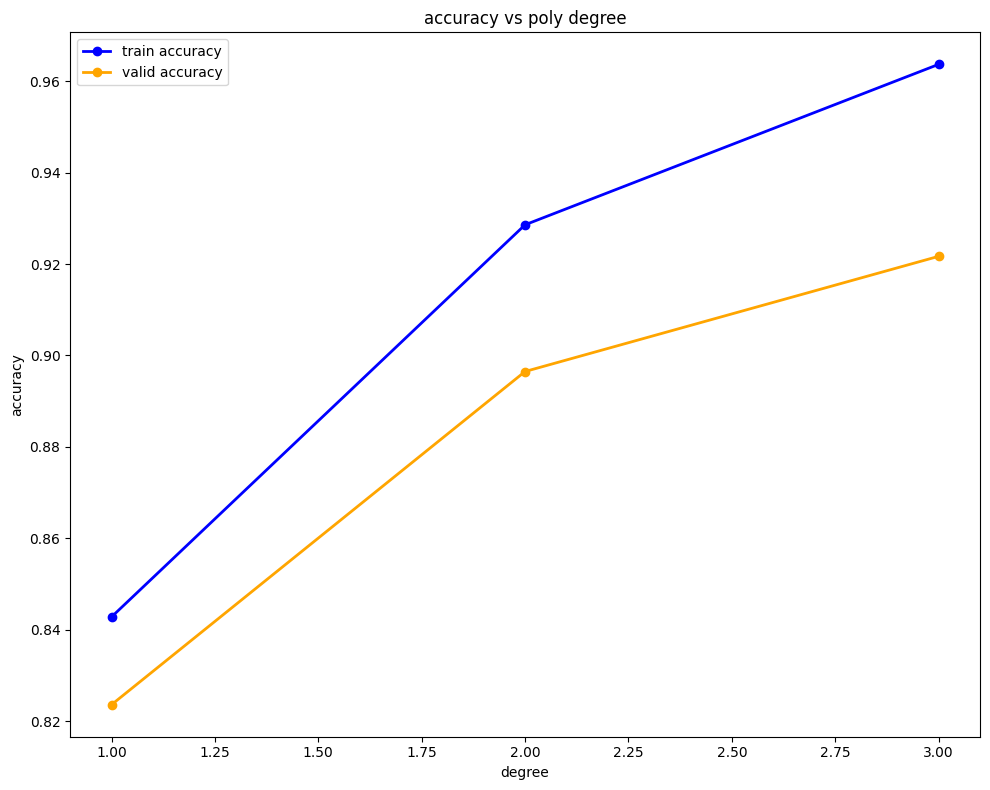

In [ ]:
# การ plot graph
fig, ax = plt.subplots(1,1, figsize=(10,8))

cpts = list(range(1, len(list_T)+1))  # Update cpts to match the length of list_T
ax.plot(
    cpts, list_T, marker='o', label="train accuracy", lw=2, color="blue")
ax.plot(
    cpts, list_V,    marker='o', label="valid accuracy", lw=2, color="orange")
ax.set_xlabel("degree")
ax.set_ylabel("accuracy")
ax.legend()
ax.set_title("accuracy vs poly degree")
plt.tight_layout()
plt.show()
plt.close('all')


In [ ]:
# การเก็บค่าสูงสุดของ accuracy
max_valid0 = max(list_V)
print(max_valid0)

0.9216921692169217


In [ ]:
#การหา index ของ accuracy ตัวนั้น
Pdegree = list_V.index(max_valid0)
print(Pdegree)

2


In [ ]:
# การทดสอบ model โดยใช้ค่า degree ที่ดีที่สุดที่เราหามา
model = LogisticRegression()

pipeline = Pipeline(steps=[
        ('Preprocessing', ct),
        ('Polynomial', PolynomialFeatures(degree = 3 )), 
        ('Modeling', model)
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_cv)
print(classification_report(y_cv, predictions )) 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.94      0.98      0.96       343
           2       0.89      0.91      0.90       133
           3       0.50      0.33      0.40        12
           4       0.79      0.52      0.63        21
           5       0.00      0.00      0.00         3
           6       0.97      0.92      0.95       233
           7       0.88      0.50      0.64        14
           8       0.67      0.80      0.73         5
           9       0.92      0.96      0.94       254
          10       0.86      0.90      0.88        73

    accuracy                           0.92      1111
   macro avg       0.75      0.70      0.72      1111
weighted avg       0.92      0.92      0.92      1111



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Random Forest**

>1, train: 0.874, valid: 0.635
>2, train: 0.869, valid: 0.627
>3, train: 0.949, valid: 0.704
>4, train: 0.967, valid: 0.746
>5, train: 0.981, valid: 0.784
>6, train: 0.984, valid: 0.794
>7, train: 0.990, valid: 0.806
>8, train: 0.992, valid: 0.815
>9, train: 0.995, valid: 0.826
>10, train: 0.996, valid: 0.824
>11, train: 0.998, valid: 0.833
>12, train: 0.999, valid: 0.836
>13, train: 0.998, valid: 0.840
>14, train: 0.998, valid: 0.845
>15, train: 0.998, valid: 0.847
>16, train: 0.998, valid: 0.850
>17, train: 0.999, valid: 0.857
>18, train: 0.999, valid: 0.853
>19, train: 0.999, valid: 0.860
>20, train: 0.999, valid: 0.860
>21, train: 0.999, valid: 0.863
>22, train: 0.999, valid: 0.860
>23, train: 0.999, valid: 0.860
>24, train: 0.999, valid: 0.855
>25, train: 1.000, valid: 0.863
>26, train: 1.000, valid: 0.862
>27, train: 1.000, valid: 0.865
>28, train: 1.000, valid: 0.864
>29, train: 1.000, valid: 0.865
>30, train: 1.000, valid: 0.860
>31, train: 1.000, valid: 0.860
>32, train: 1.000

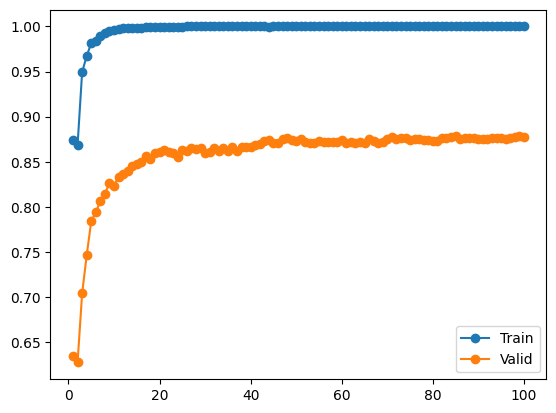

In [ ]:
# การวนลูปหาค่า n_estimators ที่ดีที่สุด
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

train_scores = [] #สร้าง list ไว้เก็บ accuracy ของ train
valid_scores = [] #สร้าง list ไว้เก็บ accuracy ของ valid

values = [i for i in range(1, 101)]
for i in values:
   #เนื่องจาก n_estimators สามารถเปลี่ยนแปลงเพื่อหาค่าที่ดีที่สุดได้ เลย set ให้เท่ากับ i แล้ววนเก็บค่าเข้า list
   modell = RandomForestClassifier(n_estimators=i,random_state=1) 
   modell.fit(X_train, y_train)

   train_predict = modell.predict(X_train)
   train_acc = accuracy_score(y_train, train_predict)
   train_scores.append(train_acc)

   valid_predict = modell.predict(X_cv)
   valid_acc = accuracy_score(y_cv, valid_predict)
   valid_scores.append(valid_acc)

   print('>%d, train: %.3f, valid: %.3f' % (i, train_acc,valid_acc))

# นำมา plot graph ระหว่าง tain กับ valid
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, valid_scores, '-o', label='Valid')
pyplot.legend()
pyplot.show()

In [ ]:
# การเก็บค่าสูงสุดของ accuracy
max_valid = max(valid_scores)
print(max_valid)

0.8784878487848785


In [ ]:
# การหา index ของ accuracy ตัวนั้น
valid_scores.index(max_valid)

84

In [ ]:
# นำ n_estimators ที่ดีที่สุดมาทำ model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_forest = X_train
y_forest = y_train

model_1 = RandomForestClassifier(n_estimators=84,random_state = 1) 

model_1.fit(X_forest,y_forest)

RandomForestClassifier(n_estimators=84, random_state=1)

In [ ]:
# ดูค่า accuracy ที่ได้
y_preds_cv = model_1.predict(X_cv)
print(classification_report(y_cv, y_preds_cv)) 

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.89      0.97      0.93       343
           2       0.91      0.77      0.84       133
           3       0.57      0.33      0.42        12
           4       1.00      0.24      0.38        21
           5       0.00      0.00      0.00         3
           6       0.91      0.91      0.91       233
           7       0.67      0.14      0.24        14
           8       1.00      0.60      0.75         5
           9       0.85      0.95      0.90       254
          10       0.78      0.82      0.80        73

    accuracy                           0.88      1111
   macro avg       0.77      0.57      0.62      1111
weighted avg       0.87      0.88      0.87      1111



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Decition Tree**

>1, train: 0.471, valid: 0.449
>2, train: 0.536, valid: 0.501
>3, train: 0.574, valid: 0.521
>4, train: 0.644, valid: 0.594
>5, train: 0.710, valid: 0.639
>6, train: 0.758, valid: 0.671
>7, train: 0.805, valid: 0.689
>8, train: 0.847, valid: 0.695
>9, train: 0.896, valid: 0.717
>10, train: 0.934, valid: 0.727
>11, train: 0.959, valid: 0.730
>12, train: 0.976, valid: 0.738
>13, train: 0.986, valid: 0.720
>14, train: 0.991, valid: 0.722
>15, train: 0.994, valid: 0.718
>16, train: 0.994, valid: 0.725
>17, train: 0.995, valid: 0.723
>18, train: 0.996, valid: 0.718
>19, train: 0.997, valid: 0.712
>20, train: 0.998, valid: 0.718
>21, train: 0.998, valid: 0.721
>22, train: 0.999, valid: 0.714
>23, train: 0.999, valid: 0.725
>24, train: 1.000, valid: 0.723
>25, train: 1.000, valid: 0.728
>26, train: 1.000, valid: 0.726
>27, train: 1.000, valid: 0.724
>28, train: 1.000, valid: 0.733
>29, train: 1.000, valid: 0.733
>30, train: 1.000, valid: 0.724
>31, train: 1.000, valid: 0.723
>32, train: 1.000

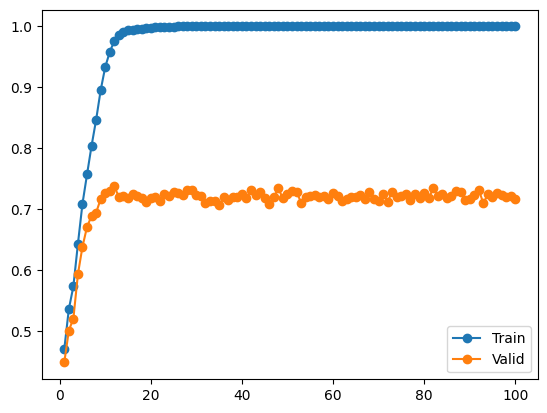

In [ ]:
# การวนลูปหาค่า max_depth ที่ดีที่สุด
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

train_tree_scores = []
valid_tree_scores = []

values = [i for i in range(1, 101)]
for i in values:
  #เนื่องจาก max_depth สามารถเปลี่ยนแปลงเพื่อหาค่าที่ดีที่สุดได้ เลย set ให้เท่ากับ i แล้ววนเก็บค่าเข้า list
  tree3 = DecisionTreeClassifier(criterion='gini', max_depth=i )
  
  # pipeline1 = Pipeline(steps=[
  #       ('model', tree3)
  # ])

  tree3.fit(X_train, y_train)
  tree_train_predict = tree3.predict(X_train)
  tree_train_acc = accuracy_score(y_train, tree_train_predict)
  train_tree_scores.append(tree_train_acc)

  tree_valid_predict = tree3.predict(X_cv)
  tree_valid_acc = accuracy_score(y_cv, tree_valid_predict)
  valid_tree_scores.append(tree_valid_acc)

  print('>%d, train: %.3f, valid: %.3f' % (i, tree_train_acc,tree_valid_acc))

# นำมา plot graph ระหว่าง tain กับ valid
pyplot.plot(values, train_tree_scores, '-o', label='Train')
pyplot.plot(values, valid_tree_scores, '-o', label='Valid')
pyplot.legend()
pyplot.show()

In [ ]:
# การเก็บค่าสูงสุดของ accuracy
max_valid2 = max(valid_tree_scores)
print(max_valid2)

0.738073807380738


In [ ]:
# การหา index ของ accuracy ตัวนั้น
valid_tree_scores.index(max_valid2)

11

In [ ]:
# นำ n_estimators ที่ดีที่สุดมาทำ model
from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=15 )
  
tree3.fit(X_train, y_train)
tree_cv_predict = tree3.predict(X_cv)

print(classification_report(y_cv, tree_cv_predict)) 

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.87      0.87      0.87       343
           2       0.55      0.59      0.57       133
           3       0.25      0.33      0.29        12
           4       0.26      0.29      0.27        21
           5       0.00      0.00      0.00         3
           6       0.77      0.69      0.72       233
           7       0.29      0.14      0.19        14
           8       0.20      0.40      0.27         5
           9       0.77      0.79      0.78       254
          10       0.71      0.66      0.68        73

    accuracy                           0.74      1111
   macro avg       0.48      0.51      0.49      1111
weighted avg       0.74      0.74      0.74      1111



##**Select Feature: ['GCG', 'CCU', 'CCA', 'UGU', 'AGG']**

###**LogisticRegression**

In [ ]:
## import library ต่างๆเข้ามาใช้งาน
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#เตรียมชิ้นส่วนเพื่อใช้งานใน Pipeline
ct = ColumnTransformer([
    ('p_con', MinMaxScaler(),[0, 1, 2, 3, 4])
])

model = LogisticRegression()     #สร้าง model โดยใช้ LogisticRegression() เป็นค่า default

#สร้าง pipeline โดยใช้ ColumnTransformer และ model ที่เราได้กำหนดไว้
pipeline = Pipeline(steps=[
    ('Preprocessing', ct),
    ('Modeling', model)
])

pipeline.fit(X_train1, y_train1)                 #เรียนรู้ Parameters ต่าง ๆ ใน Pipeline
predictions = pipeline.predict(X_cv1)       #ทำการ predict 

print(classification_report(y_cv1, predictions))

              precision    recall  f1-score   support

         arc       0.00      0.00      0.00        20
         bct       0.65      0.91      0.75       343
         inv       0.26      0.04      0.07       133
         mam       0.00      0.00      0.00        12
         phg       0.00      0.00      0.00        21
         plm       0.00      0.00      0.00         3
         pln       0.48      0.39      0.43       233
         pri       0.00      0.00      0.00        14
         rod       0.00      0.00      0.00         5
         vrl       0.47      0.75      0.58       254
         vrt       0.73      0.11      0.19        73

    accuracy                           0.55      1111
   macro avg       0.24      0.20      0.18      1111
weighted avg       0.49      0.55      0.48      1111



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# การสร้าง model LogisticRegression โดยที่เราจะวลลูปหาค่า degree ที่จะให้ผล accuracy ที่มากที่สุด
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
list_T = []  #สร้าง list ไว้เก็บ accuracy ของ train
list_V = []  #สร้าง list ไว้เก็บ accuracy ของ valid

for i in range(3):
    model = LogisticRegression()

    pipeline = Pipeline(steps=[
        ('Preprocessing', ct),
        ('Polynomial', PolynomialFeatures(degree=i + 1 )),  # Set degree to i + 1
        ('Modeling', model)
    ])

    pipeline.fit(X_train1, y_train1)
    predictions = pipeline.predict(X_cv1)
    predictions2 = pipeline.predict(X_train1)
    
    list_T.append(accuracy_score(y_train1, predictions2))
    list_V.append(accuracy_score(y_cv1, predictions))

print(list_T)
print(list_V)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.5631563156315632, 0.5715571557155715, 0.5763576357635763]
[0.5454545454545454, 0.5508550855085509, 0.5562556255625563]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


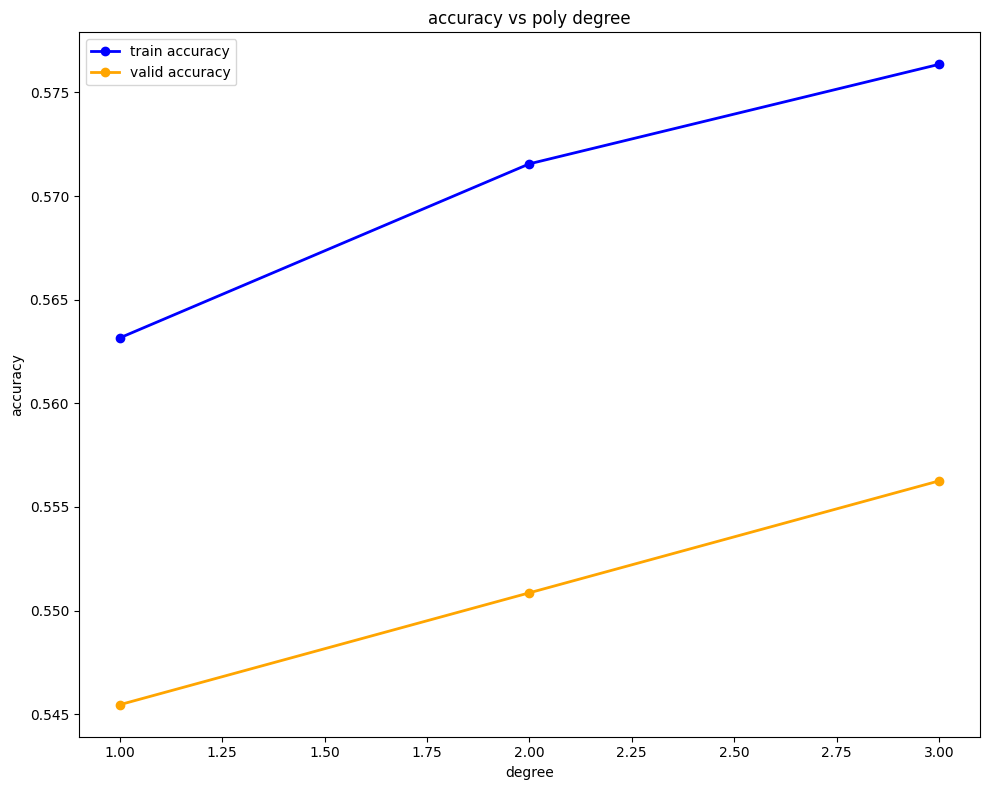

In [ ]:
# การ plot graph
fig, ax = plt.subplots(1,1, figsize=(10,8))

cpts = list(range(1, len(list_T)+1))  # Update cpts to match the length of list_T
ax.plot(
    cpts, list_T, marker='o', label="train accuracy", lw=2, color="blue")
ax.plot(
    cpts, list_V,    marker='o', label="valid accuracy", lw=2, color="orange")
ax.set_xlabel("degree")
ax.set_ylabel("accuracy")
ax.legend()
ax.set_title("accuracy vs poly degree")
plt.tight_layout()
plt.show()
plt.close('all')


In [ ]:
# การเก็บค่าสูงสุดของ accuracy
max_valid0 = max(list_V)
print(max_valid0)

0.5562556255625563


In [ ]:
#การหา index ของ accuracy ตัวนั้น
Pdegree = list_V.index(max_valid0)
print(Pdegree)

2


In [ ]:
# การทดสอบ model โดยใช้ค่า degree ที่ดีที่สุดที่เราหามา
model = LogisticRegression()

pipeline = Pipeline(steps=[
        ('Preprocessing', ct),
        ('Polynomial', PolynomialFeatures(degree = 3 )), 
        ('Modeling', model)
])

pipeline.fit(X_train1, y_train1)
predictions = pipeline.predict(X_cv1)
print(classification_report(y_cv1, predictions )) 


              precision    recall  f1-score   support

         arc       0.00      0.00      0.00        20
         bct       0.65      0.91      0.76       343
         inv       0.24      0.04      0.06       133
         mam       0.00      0.00      0.00        12
         phg       0.00      0.00      0.00        21
         plm       0.00      0.00      0.00         3
         pln       0.48      0.46      0.47       233
         pri       0.00      0.00      0.00        14
         rod       0.00      0.00      0.00         5
         vrl       0.50      0.73      0.59       254
         vrt       0.67      0.14      0.23        73

    accuracy                           0.56      1111
   macro avg       0.23      0.21      0.19      1111
weighted avg       0.49      0.56      0.49      1111



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

###**Random Forest**

>1, train: 0.831, valid: 0.516
>2, train: 0.819, valid: 0.537
>3, train: 0.907, valid: 0.563
>4, train: 0.932, valid: 0.581
>5, train: 0.950, valid: 0.581
>6, train: 0.963, valid: 0.596
>7, train: 0.971, valid: 0.589
>8, train: 0.974, valid: 0.602
>9, train: 0.980, valid: 0.605
>10, train: 0.981, valid: 0.614
>11, train: 0.986, valid: 0.617
>12, train: 0.987, valid: 0.620
>13, train: 0.990, valid: 0.621
>14, train: 0.989, valid: 0.617
>15, train: 0.991, valid: 0.624
>16, train: 0.992, valid: 0.626
>17, train: 0.994, valid: 0.622
>18, train: 0.995, valid: 0.624
>19, train: 0.995, valid: 0.620
>20, train: 0.995, valid: 0.631
>21, train: 0.995, valid: 0.631
>22, train: 0.996, valid: 0.635
>23, train: 0.997, valid: 0.629
>24, train: 0.998, valid: 0.636
>25, train: 0.998, valid: 0.627
>26, train: 0.997, valid: 0.637
>27, train: 0.998, valid: 0.637
>28, train: 0.997, valid: 0.638
>29, train: 0.998, valid: 0.636
>30, train: 0.998, valid: 0.635
>31, train: 0.998, valid: 0.632
>32, train: 0.998

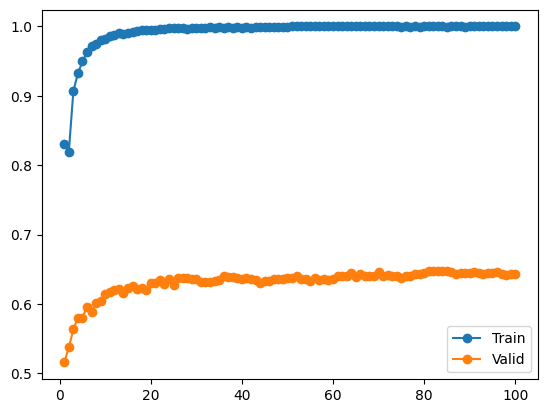

In [ ]:
# การวนลูปหาค่า n_estimators ที่ดีที่สุด
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

train_scores = [] #สร้าง list ไว้เก็บ accuracy ของ train
valid_scores = [] #สร้าง list ไว้เก็บ accuracy ของ valid

values = [i for i in range(1, 101)]
for i in values:
   #เนื่องจาก n_estimators สามารถเปลี่ยนแปลงเพื่อหาค่าที่ดีที่สุดได้ เลย set ให้เท่ากับ i แล้ววนเก็บค่าเข้า list
   modell = RandomForestClassifier(n_estimators=i,random_state=1) 
   modell.fit(X_train1, y_train1)

   train_predict = modell.predict(X_train1)
   train_acc = accuracy_score(y_train1, train_predict)
   train_scores.append(train_acc)

   valid_predict = modell.predict(X_cv1)
   valid_acc = accuracy_score(y_cv1, valid_predict)
   valid_scores.append(valid_acc)

   print('>%d, train: %.3f, valid: %.3f' % (i, train_acc,valid_acc))

# นำมา plot graph ระหว่าง tain กับ valid
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, valid_scores, '-o', label='Valid')
pyplot.legend()
pyplot.show()

In [ ]:
# การเก็บค่าสูงสุดของ accuracy
max_valid = max(valid_scores)
print(max_valid)

0.648064806480648


In [ ]:
# การหา index ของ accuracy ตัวนั้น
valid_scores.index(max_valid)

81

In [ ]:
# นำ n_estimators ที่ดีที่สุดมาทำ model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_forest = X_train1
y_forest = y_train1

model_1 = RandomForestClassifier(n_estimators=82,random_state = 1) 

model_1.fit(X_forest,y_forest)

RandomForestClassifier(n_estimators=82, random_state=1)

In [ ]:
# ดูค่า accuracy ที่ได้
y_preds_cv = model_1.predict(X_cv1)
print(classification_report(y_cv1, y_preds_cv)) 

              precision    recall  f1-score   support

         arc       0.53      0.50      0.51        20
         bct       0.80      0.91      0.85       343
         inv       0.47      0.28      0.35       133
         mam       0.00      0.00      0.00        12
         phg       0.67      0.10      0.17        21
         plm       0.00      0.00      0.00         3
         pln       0.55      0.64      0.59       233
         pri       0.00      0.00      0.00        14
         rod       0.00      0.00      0.00         5
         vrl       0.62      0.73      0.67       254
         vrt       0.53      0.34      0.42        73

    accuracy                           0.65      1111
   macro avg       0.38      0.32      0.32      1111
weighted avg       0.62      0.65      0.62      1111



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Decition Tree**

>1, train: 0.471, valid: 0.449
>2, train: 0.506, valid: 0.486
>3, train: 0.557, valid: 0.529
>4, train: 0.582, valid: 0.556
>5, train: 0.613, valid: 0.572
>6, train: 0.638, valid: 0.579
>7, train: 0.676, valid: 0.587
>8, train: 0.719, valid: 0.581
>9, train: 0.758, valid: 0.547
>10, train: 0.806, valid: 0.566
>11, train: 0.856, valid: 0.564
>12, train: 0.893, valid: 0.550
>13, train: 0.923, valid: 0.538
>14, train: 0.944, valid: 0.530
>15, train: 0.960, valid: 0.527
>16, train: 0.974, valid: 0.527
>17, train: 0.983, valid: 0.536
>18, train: 0.991, valid: 0.526
>19, train: 0.995, valid: 0.518
>20, train: 0.997, valid: 0.530
>21, train: 0.998, valid: 0.519
>22, train: 0.998, valid: 0.522
>23, train: 0.998, valid: 0.523
>24, train: 0.998, valid: 0.525
>25, train: 0.999, valid: 0.513
>26, train: 0.999, valid: 0.523
>27, train: 0.999, valid: 0.514
>28, train: 1.000, valid: 0.517
>29, train: 1.000, valid: 0.515
>30, train: 1.000, valid: 0.508
>31, train: 1.000, valid: 0.525
>32, train: 1.000

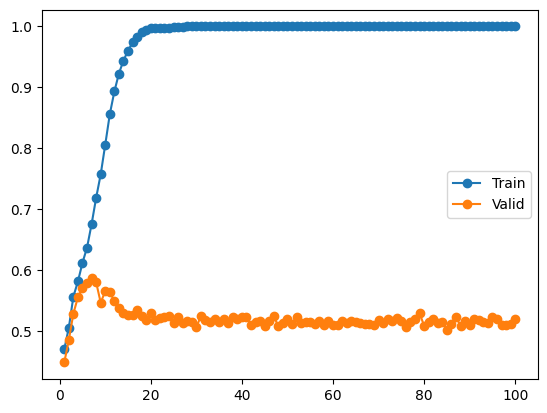

In [ ]:
# การวนลูปหาค่า max_depth ที่ดีที่สุด
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

train_tree_scores = []
valid_tree_scores = []

values = [i for i in range(1, 101)]
for i in values:
  #เนื่องจาก max_depth สามารถเปลี่ยนแปลงเพื่อหาค่าที่ดีที่สุดได้ เลย set ให้เท่ากับ i แล้ววนเก็บค่าเข้า list
  tree3 = DecisionTreeClassifier(criterion='gini', max_depth=i )
  
  # pipeline1 = Pipeline(steps=[
  #       ('model', tree3)
  # ])

  tree3.fit(X_train1, y_train1)
  tree_train_predict = tree3.predict(X_train1)
  tree_train_acc = accuracy_score(y_train1, tree_train_predict)
  train_tree_scores.append(tree_train_acc)

  tree_valid_predict = tree3.predict(X_cv1)
  tree_valid_acc = accuracy_score(y_cv1, tree_valid_predict)
  valid_tree_scores.append(tree_valid_acc)

  print('>%d, train: %.3f, valid: %.3f' % (i, tree_train_acc,tree_valid_acc))

# นำมา plot graph ระหว่าง tain กับ valid
pyplot.plot(values, train_tree_scores, '-o', label='Train')
pyplot.plot(values, valid_tree_scores, '-o', label='Valid')
pyplot.legend()
pyplot.show()

In [ ]:
# การเก็บค่าสูงสุดของ accuracy
max_valid2 = max(valid_tree_scores)
print(max_valid2)

0.5868586858685868


In [ ]:
# การหา index ของ accuracy ตัวนั้น
valid_tree_scores.index(max_valid2)

6

In [ ]:
# นำ n_estimators ที่ดีที่สุดมาทำ model
from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=6 )
  
tree3.fit(X_train1, y_train1)
tree_cv_predict = tree3.predict(X_cv1)

print(classification_report(y_cv1, tree_cv_predict)) 

              precision    recall  f1-score   support

         arc       0.33      0.10      0.15        20
         bct       0.77      0.80      0.79       343
         inv       0.31      0.20      0.25       133
         mam       0.00      0.00      0.00        12
         phg       0.00      0.00      0.00        21
         plm       0.00      0.00      0.00         3
         pln       0.48      0.65      0.55       233
         pri       0.00      0.00      0.00        14
         rod       0.00      0.00      0.00         5
         vrl       0.60      0.62      0.61       254
         vrt       0.35      0.38      0.37        73

    accuracy                           0.58      1111
   macro avg       0.26      0.25      0.25      1111
weighted avg       0.54      0.58      0.55      1111



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Evaluation of Test Set:**


```
หลังจากที่ได้ setting ที่ดีที่สุดใน Phase 3 แล้ว ให้วัดผล model เป็นกับ Test set เพื่อสรุปผลการทดลอง
```



**สรุปผล:** จากการที่เราได้นำ model ที่ดีที่สุดของเราคือ LogisticRegression ที่มี PolynomialFeatures( degree = 3 ) มาใช้ในการ Predict Data Set ของตัว Test set ซึ่งได้ accuracy ที่ค่อนข้างดีมากนั่นก็คือ 0.93 ทำให้เห็นว่า model ที่เราทำมีประสิทธิภาพ


In [ ]:
#เตรียมชิ้นส่วนเพื่อใช้งานใน Pipeline
ct = ColumnTransformer([
    ('p_con', MinMaxScaler(),[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])
])

model = LogisticRegression()     #สร้าง model โดยใช้ LogisticRegression() เป็นค่า default

#สร้าง pipeline โดยใช้ ColumnTransformer และ model ที่เราได้กำหนดไว้
pipeline = Pipeline(steps=[
   ('Preprocessing', ct),
   ('Polynomial', PolynomialFeatures(degree = 3 )), 
   ('Modeling', model)
])

pipeline.fit(X_train, y_train)                 #เรียนรู้ Parameters ต่าง ๆ ใน Pipeline
predictions = pipeline.predict(X_test)       #ทำการ predict 

print(classification_report(y_test, predictions))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.96      0.95      0.95       367
           2       0.93      0.88      0.91       130
           3       0.92      0.65      0.76        17
           4       0.73      0.59      0.65        27
           5       0.00      0.00      0.00         5
           6       0.91      0.95      0.93       212
           7       0.75      0.82      0.78        11
           8       0.57      0.67      0.62         6
           9       0.95      0.97      0.96       273
          10       0.84      0.94      0.88        49

    accuracy                           0.93      1111
   macro avg       0.76      0.76      0.75      1111
weighted avg       0.92      0.93      0.92      1111



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
